In [63]:
import pandas as pd

In [64]:
d_p = pd.read_csv("final_progression.csv")
d = pd.read_csv("final_overall.csv")

In [65]:
d_p

,time,SurvivalProbability
0,1.0,97.981500
1,2.0,93.555000
2,3.0,88.552750
3,4.0,82.096000
4,5.0,77.516500
5,6.0,65.019200
6,7.0,58.840333
7,8.0,43.549750
8,9.0,23.787000
9,10.0,21.168500


In [66]:
d

,time,SurvivalProbability
0,1.0,99.235333
1,2.0,97.109000
2,3.0,94.871333
3,4.0,90.866000
4,5.0,88.994500
5,6.0,87.340000
6,7.0,84.811000
7,8.0,83.496667
8,9.0,82.657000
9,10.0,80.863667


In [67]:
d_p["Progression"] = (d_p["SurvivalProbability"] - d["SurvivalProbability"])*(-1)

In [68]:
d_p

,time,SurvivalProbability,Progression
0,1.0,97.981500,1.253833
1,2.0,93.555000,3.554000
2,3.0,88.552750,6.318583
3,4.0,82.096000,8.770000
4,5.0,77.516500,11.478000
5,6.0,65.019200,22.320800
6,7.0,58.840333,25.970667
7,8.0,43.549750,39.946917
8,9.0,23.787000,58.870000
9,10.0,21.168500,59.695167


In [69]:
d_p["Death"] = 100 - d_p["Progression"]
d_p.drop(["SurvivalProbability","Progression"],axis=1,inplace=True)
d_p

,time,Death
0,1.0,98.746167
1,2.0,96.446000
2,3.0,93.681417
3,4.0,91.230000
4,5.0,88.522000
5,6.0,77.679200
6,7.0,74.029333
7,8.0,60.053083
8,9.0,41.130000
9,10.0,40.304833


In [78]:
import numpy as np
prob_1 = d_p["Death"].values
event_1 = []
for i in range(13):
    random_number = np.random.randint(0, 101)
    if random_number >= prob_1[i]:
        event_1.append(0)
    else:
        event_1.append(1)

In [79]:
event_1

[1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0]

In [80]:
data = {
    "OverallSurvivalTime":np.arange(1, 14),
    'OverallSurvivalEvent':event_1,
}

In [81]:
data

{'OverallSurvivalTime': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 'OverallSurvivalEvent': [1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0]}

In [82]:
from lifelines import KaplanMeierFitter

individual_data = pd.DataFrame()

df = pd.DataFrame(data)

def generate_km_data(event_times, event_types):
    km_data = pd.DataFrame(columns=['Time', 'Event'])
    km_data['Time'] = sorted(event_times)
    km_data['Event'] = [1 if event == 1 else 0 for event in event_types]  # Convert event types to 1 for event, 0 for censored
    return km_data

# Generate individual patient-level data for overall survival
overall_survival_km_data = generate_km_data(df['OverallSurvivalTime'], df['OverallSurvivalEvent'])

kmf = KaplanMeierFitter()
kmf.fit(overall_survival_km_data['Time'], event_observed=overall_survival_km_data['Event'])


# Display individual patient-level data
print("Individual patient-level data for overall survival:")
print(overall_survival_km_data)

Individual patient-level data for overall survival:
    Time  Event
0      1      1
1      2      1
2      3      1
3      4      1
4      5      1
5      6      0
6      7      1
7      8      1
8      9      0
9     10      1
10    11      0
11    12      0
12    13      0


In [84]:
from lifelines import WeibullFitter, LogLogisticFitter, ExponentialFitter

survival_times = np.arange(1,14)
censoring_indicators = overall_survival_km_data["Event"]

weibull_fitter = WeibullFitter()
weibull_fitter.fit(survival_times, event_observed=(1-censoring_indicators))
loglogistic_fitter = LogLogisticFitter()
loglogistic_fitter.fit(survival_times, event_observed=(1-censoring_indicators))
exponential_fitter = ExponentialFitter()
exponential_fitter.fit(survival_times, event_observed=(1-censoring_indicators))

print("Weibull AIC:", weibull_fitter.AIC_)
print("Log-Logistic AIC:", loglogistic_fitter.AIC_)
print("Exponential AIC:", exponential_fitter.AIC_)

Weibull AIC: 28.252832951820185
Log-Logistic AIC: 29.87992178096383
Exponential AIC: 41.0142159408275


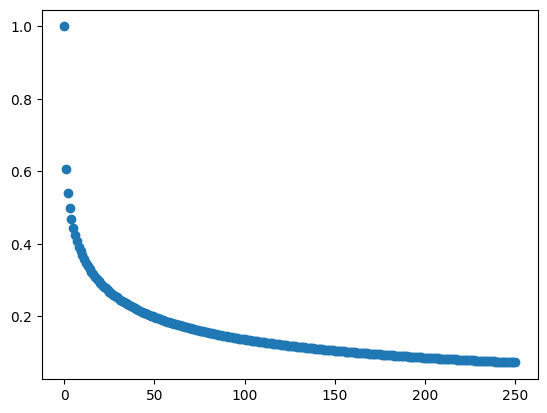

In [112]:
from scipy.stats import weibull_min

shape = 0.3
scale = 10

time_values = np.arange(0, 251)

probabilities = 1 - weibull_min.cdf(time_values, c=shape, scale=scale)

data = {'ID': time_values, 'Probability': probabilities}
df = pd.DataFrame(data)

import matplotlib.pyplot as plt
plt.scatter(df["ID"],df["Probability"])

In [108]:
df.to_csv('sub11.csv', index=False)